##**Name:** Shubham Balasaheb Pawar
##**Organization :** The Spark Foundation
##**Internship :** Data Science & Bussiness Analytics
##**Task :** Prediction using Decision Tree Algorithm
##**Task Level :** Intermediate
##**Task to perform :** The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly

##**Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

##**Importing the dataset**

In [37]:
dataset = pd.read_csv('Iris.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

##**Encoding categorical data**

In [3]:
le = LabelEncoder()
y = le.fit_transform(y)

In [4]:
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
dataset.shape

(150, 6)

In [7]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


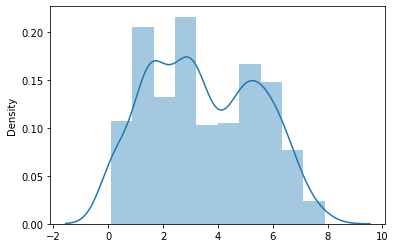

In [8]:
sns.distplot(X)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


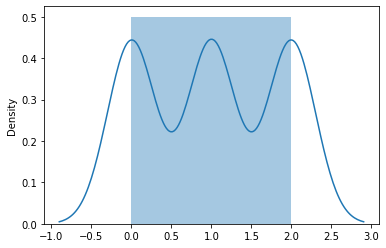

In [9]:
sns.distplot(y)

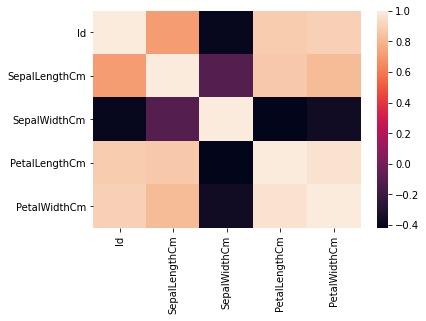

In [10]:
sns.heatmap(dataset.corr())

##**Splitting the dataset into the Training set and Test set**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
print(X_train)

[[5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.1]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.  5.8 2.2]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [6.5 3.2 5.1 2. ]
 [6.7 3.3 5.

In [13]:
print(y_train)

[1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1
 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0
 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2
 0]


In [14]:
print(X_test)

[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]
 [6.3 3.3 6.  2.5]
 [5.  3.5 1.3 0.3]
 [6.7 3.1 4.7 1.5]
 [6.8 2.8 4.8 1.4]
 [6.1 2.8 4.  1.3]
 [6.1 2.6 5.6 1.4]
 [6.4 3.2 4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [6.5 2.8 4.6 1.5]
 [6.1 2.9 4.7 1.4]
 [4.9 3.1 1.5 0.1]
 [6.  2.9 4.5 1.5]
 [5.5 2.6 4.4 1.2]
 [4.8 3.  1.4 0.3]
 [5.4 3.9 1.3 0.4]
 [5.6 2.8 4.9 2. ]
 [5.6 3.  4.5 1.5]
 [4.8 3.4 1.9 0.2]
 [4.4 2.9 1.4 0.2]
 [6.2 2.8 4.8 1.8]
 [4.6 3.6 1.  0.2]
 [5.1 3.8 1.9 0.4]
 [6.2 2.9 4.3 1.3]
 [5.  2.3 3.3 1. ]
 [5.  3.4 1.6 0.4]
 [6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]
 [5.2 2.7 3.9 1.4]
 [5.7 3.8 1.7 0.3]
 [6.  2.7 5.1 1.6]]


In [15]:
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


##**Feature Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
print(X_train)

[[ 1.54399532e-02 -1.19254753e-01  2.25126850e-01  3.56381749e-01]
 [-9.98450310e-02 -1.04039491e+00  1.13559562e-01 -2.86480506e-02]
 [ 1.05300481e+00 -1.19254753e-01  9.50314227e-01  1.12644135e+00]
 [-1.36797986e+00  3.41315328e-01 -1.39259884e+00 -1.31208072e+00]
 [ 1.16828980e+00  1.11030287e-01  7.27179649e-01  1.38312788e+00]
 [-1.02212490e+00  1.03217045e+00 -1.22524790e+00 -7.98707650e-01]
 [-5.60984968e-01  1.49274053e+00 -1.28103155e+00 -1.31208072e+00]
 [-1.02212490e+00 -2.42210516e+00 -1.65358660e-01 -2.85334584e-01]
 [ 7.07149859e-01 -1.19254753e-01  9.50314227e-01  7.41411549e-01]
 [ 9.37719827e-01  5.71600368e-01  1.06188152e+00  1.63981441e+00]
 [ 1.30724937e-01 -1.96153508e+00  6.71396005e-01  3.56381749e-01]
 [ 9.37719827e-01 -1.27067995e+00  1.11766516e+00  7.41411549e-01]
 [-3.30414999e-01 -1.27067995e+00  5.77759173e-02 -1.56991317e-01]
 [ 2.09056967e+00 -1.19254753e-01  1.28501609e+00  1.38312788e+00]
 [ 4.76579890e-01  5.71600368e-01  5.04045072e-01  4.84725016e

In [18]:
print(X_test)

[[-0.09984503 -0.57982483  0.72717965  1.51147115]
 [ 0.13072494 -1.96153508  0.11355956 -0.28533458]
 [-0.44569998  2.64416573 -1.33681519 -1.31208072]
 [ 1.62942973 -0.34953979  1.39658338  0.74141155]
 [-1.0221249   0.80188541 -1.28103155 -1.31208072]
 [ 0.47657989  0.57160037  1.22923245  1.63981441]
 [-1.0221249   1.03217045 -1.39259884 -1.18373745]
 [ 0.93771983  0.11103029  0.50404507  0.35638175]
 [ 1.05300481 -0.57982483  0.55982872  0.22803848]
 [ 0.24600992 -0.57982483  0.11355956  0.09969522]
 [ 0.24600992 -1.04039491  1.00609787  0.22803848]
 [ 0.59186487  0.34131533  0.39247778  0.35638175]
 [ 0.24600992 -0.57982483  0.50404507 -0.02864805]
 [ 0.70714986 -0.57982483  0.44826143  0.35638175]
 [ 0.24600992 -0.34953979  0.50404507  0.22803848]
 [-1.13740989  0.11103029 -1.28103155 -1.44042398]
 [ 0.13072494 -0.34953979  0.39247778  0.35638175]
 [-0.44569998 -1.04039491  0.33669414 -0.02864805]
 [-1.25269487 -0.11925475 -1.33681519 -1.18373745]
 [-0.56098497  1.95331061 -1.39

##**Training the Decision Tree Classification model on the Training set**


In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

##Predicting the Test set results

In [20]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 1]]


##**Making the Confusion Matrix**

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


0.9736842105263158

##**Predicting a new result**

In [23]:
print(classifier.predict(sc.transform([[5.5, 3.5, 2.5, 1.5]])))   #Type of species for given input is iris setosa 

[1]
